<a href="https://colab.research.google.com/github/minzeros/codestates_section_project/blob/main/section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 선정 이유 및 문제 정의

와인 데이터셋으로 해당 와인을 추천과 비추천으로 분류해주는 머신러닝을 만드는 것이 흥미로울 것 같아서 선택하게 되었다.

Target은 Quality 컬럼으로 잡았고, 원본 데이터셋에서 quality 컬럼은 1-10의 점수를 갖는다.

와인 품질에 대해서 추천, 비추천 클래스로 와인을 분류하는 것이 목표이므로, 

캐글의 데이터 Detail을 참고하여 7점이상은 추천, 나머지는 비추천으로 분류할 예정이다.

# 2. 가설 및 평가지표, 베이스라인 선택

분류 모델로 머신러닝 모델을 구현할 예정이므로 평가지표로 classification_report를 사용할 것이다.

베이스라인은 클래스 최빈값으로 잡았다.

In [ ]:
Red Wine Quality - Kaggle

Input variables (based on physicochemical tests):
1 - fixed acidity        고정 산도
2 - volatile acidity     휘발성 산도
3 - citric acid          구연산
4 - residual sugar       잔류당
5 - chlorides            염화물
6 - free sulfur dioxide  유리 이산화황
7 - total sulfur dioxide 총 이산화황
8 - density              밀도
9 - pH                   수소 이온 농도
10 - sulphates           황산염
11 - alcohol             알코올

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

# 3. EDA와 전처리

In [ ]:
!pip3 install pandas_profiling --upgrade

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached pydantic-1.8.2-cp37-cp37m-manylinux2014_x86_64.whl (10.1 MB)
  Using cached multimethod-1.6-py3-none-any.whl (9.4 kB)
  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Using cached phik-0.12.0-cp37-cp37m-manylinux2010_x86_64.whl (675 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl
  Using cached scipy-1.7.2-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.2 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uni

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
wine = pd.read_csv('/content/winequality-red.csv')

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

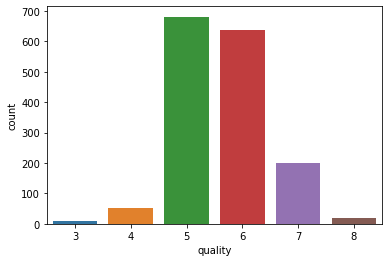

In [ ]:
sns.countplot(x=wine.quality);

In [ ]:
wine.quality.mean()

5.6360225140712945

In [ ]:
len(wine[wine.quality > 5]), len(wine[wine.quality <= 5])

(855, 744)

In [ ]:
len(wine[wine.quality >= 7]), len(wine[wine.quality < 7])

(217, 1382)

In [ ]:
wine['recommendation'] = (wine['quality'] >= 6).astype(int)
wine.recommendation.value_counts()

# class 0 : 비추천
# class 1 : 추천

1    855
0    744
Name: recommendation, dtype: int64

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommendation
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
recommendation            int64
dtype: object

In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
recommendation          0
dtype: int64

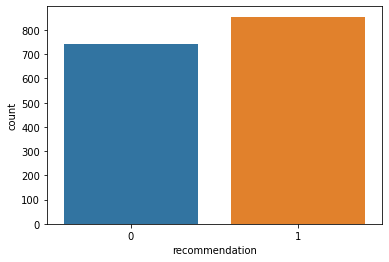

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=wine.recommendation);

In [ ]:
wine.drop('quality', axis=1, inplace=True)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,recommendation
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


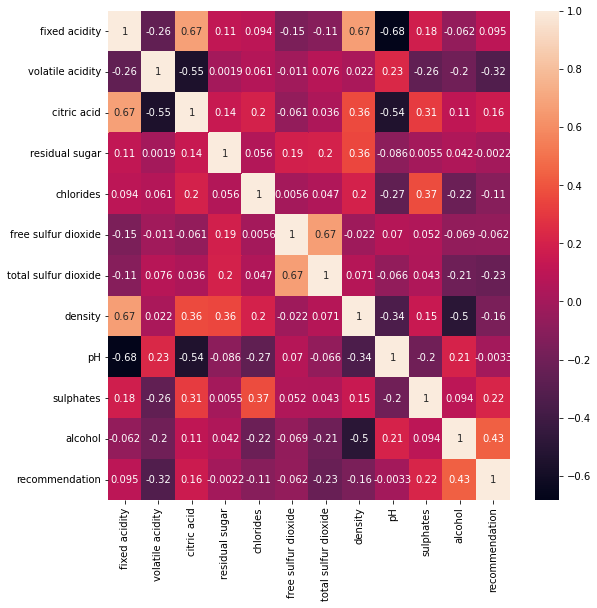

In [ ]:
correlation = wine.corr()
plt.figure(figsize=(9, 9))
heatmap = sns.heatmap(correlation, annot=True)
plt.show()

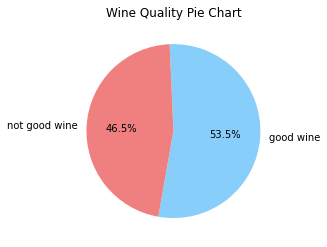

In [ ]:
good = len(wine[wine.recommendation == 1]) / len(wine)
notgood = len(wine[wine.recommendation == 0]) / len(wine)
ratio = [good, notgood]
labels = ['good wine', 'not good wine']
colors = ['lightskyblue', 'lightcoral']

plt.title('Wine Quality Pie Chart')
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, colors=colors)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05187ab610>,
      dtype=object)

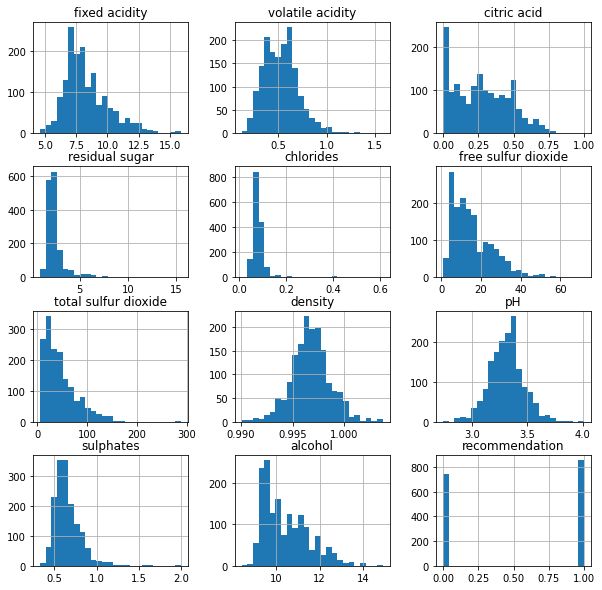

In [ ]:
wine.hist(bins=25,figsize=(10,10))

In [ ]:
train, test = train_test_split(wine, test_size=0.2, random_state=10)
len(train), len(test)

(1279, 320)

In [ ]:
train, val = train_test_split(train, test_size=0.2, random_state=10)
len(train), len(val)

(1023, 256)

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,recommendation
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,8.357869,0.522967,0.275191,2.550684,0.087468,15.823558,46.769306,0.996772,3.307889,0.660078,10.430580,0.541544
std,1.755398,0.176269,0.193654,1.415508,0.049935,10.428533,33.257418,0.001912,0.153116,0.174446,1.079956,0.498515
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995630,3.210000,0.550000,9.500000,0.000000
50%,8.000000,0.520000,0.260000,2.200000,0.079000,13.000000,38.000000,0.996800,3.300000,0.620000,10.200000,1.000000
75%,9.300000,0.630000,0.430000,2.600000,0.090000,21.000000,63.000000,0.997870,3.400000,0.730000,11.050000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,1.000000


In [ ]:
target = 'recommendation'
features = train.drop('recommendation', axis=1).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [ ]:
X_test = test[features]
y_test = test[target]

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
777,6.9,0.635,0.17,2.40,0.241,6.0,18.0,0.99610,3.40,0.59,10.3
800,7.2,0.610,0.08,4.00,0.082,26.0,108.0,0.99641,3.25,0.51,9.4
563,7.6,0.290,0.49,2.70,0.092,25.0,60.0,0.99710,3.31,0.61,10.1
1201,7.9,0.340,0.36,1.90,0.065,5.0,10.0,0.99419,3.27,0.54,11.2
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9
...,...,...,...,...,...,...,...,...,...,...,...
1067,11.1,0.310,0.53,2.20,0.060,3.0,10.0,0.99572,3.02,0.83,10.9
747,8.6,0.330,0.40,2.60,0.083,16.0,68.0,0.99782,3.30,0.48,9.4
671,8.2,0.730,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5
675,9.3,0.410,0.39,2.20,0.064,12.0,31.0,0.99840,3.26,0.65,10.2


In [ ]:
baseline = y_train.mode()[0]
y_pred = [baseline] * len(y_train)
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.541544477028348


In [ ]:
baseline = y_val.mode()[0]
y_pred = [baseline] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

validation accuracy:  0.515625


# 4. 머신러닝 방식 적용 및 교차검증

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# 로지스틱 회귀

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
logistic = LogisticRegression(random_state=10)
logistic.fit(X_train_scaled, y_train)

y_pred_log = logistic.predict(X_val_scaled)
print(f'검증 정확도 : {accuracy_score(y_val, y_pred_log)}')

검증 정확도 : 0.7734375


In [ ]:
coefficients = pd.Series(logistic.coef_[0], X_train.columns)
coefficients.sort_values()

volatile acidity       -0.581759
total sulfur dioxide   -0.401283
citric acid            -0.290421
chlorides              -0.235495
pH                     -0.042380
density                -0.013158
residual sugar          0.000837
free sulfur dioxide     0.139243
fixed acidity           0.199705
sulphates               0.515090
alcohol                 0.919401
dtype: float64

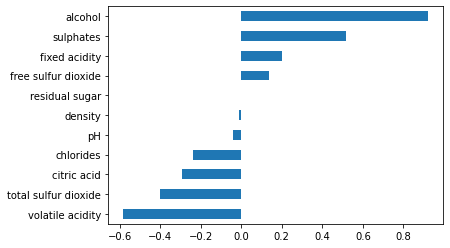

In [ ]:
coefficients.sort_values().plot.barh();

In [ ]:
print(classification_report(y_val, y_pred_log))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       132
           1       0.74      0.82      0.78       124

    accuracy                           0.77       256
   macro avg       0.78      0.77      0.77       256
weighted avg       0.78      0.77      0.77       256



In [ ]:
# 결정트리

In [ ]:
dt_model = DecisionTreeClassifier(random_state=1, criterion='entropy')
dt_model.fit(X_train, y_train)

print('훈련 정확도: ', dt_model.score(X_train, y_train))
print('검증 정확도: ', dt_model.score(X_val, y_val))

훈련 정확도:  1.0
검증 정확도:  0.74609375


In [ ]:
dt_model = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=4)
dt_model.fit(X_train, y_train)

print('훈련 정확도: ', dt_model.score(X_train, y_train))
print('검증 정확도: ', dt_model.score(X_val, y_val))

훈련 정확도:  0.7546432062561095
검증 정확도:  0.69921875


In [ ]:
importances = pd.Series(dt_model.feature_importances_, X_train.columns)
importances.sort_values()

citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.000000
density                 0.000000
pH                      0.000000
volatile acidity        0.081621
total sulfur dioxide    0.106113
fixed acidity           0.119539
sulphates               0.166482
alcohol                 0.526245
dtype: float64

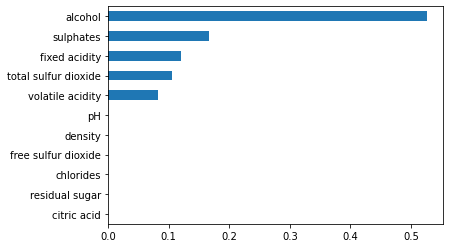

In [ ]:
importances.sort_values().plot.barh();

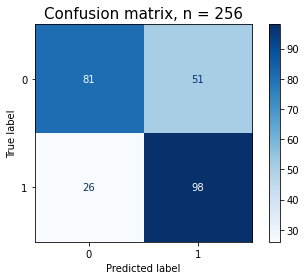

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(dt_model, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
y_pred_dt = dt_model.predict(X_val)
print(classification_report(y_val, y_pred_dt))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68       132
           1       0.66      0.79      0.72       124

    accuracy                           0.70       256
   macro avg       0.71      0.70      0.70       256
weighted avg       0.71      0.70      0.70       256



In [ ]:
# 랜덤포레스트

In [ ]:
rf_model = RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True) # n_estimator=100 default
rf_model.fit(X_train, y_train)

print('검증 정확도: ', rf_model.score(X_val, y_val))

검증 정확도:  0.8359375


In [ ]:
rf_model.oob_score_

0.9107589658048374

In [ ]:
importances = pd.Series(dt_model.feature_importances_, X_train.columns)
importances.sort_values()

citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.000000
density                 0.000000
pH                      0.000000
volatile acidity        0.081621
total sulfur dioxide    0.106113
fixed acidity           0.119539
sulphates               0.166482
alcohol                 0.526245
dtype: float64

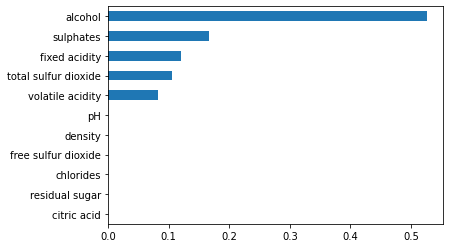

In [ ]:
importances.sort_values().plot.barh()

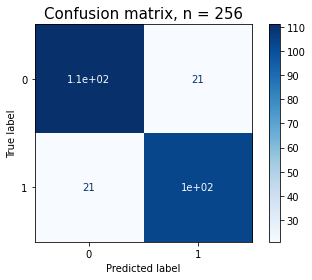

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(rf_model, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
y_pred_rf = rf_model.predict(X_val)
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       132
           1       0.83      0.83      0.83       124

    accuracy                           0.84       256
   macro avg       0.84      0.84      0.84       256
weighted avg       0.84      0.84      0.84       256



In [ ]:
# 랜덤포레스트, 적절한 임계값 찾기

In [ ]:
# ROC curve, AUC

In [ ]:
from sklearn.metrics import roc_curve

y_pred_proba = dt_model.predict_proba(X_val)[:, 1]

# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,2.000000
1,0.015152,0.024194,1.000000
2,0.015152,0.129032,0.988889
3,0.015152,0.201613,0.945946
4,0.151515,0.467742,0.786802
5,0.159091,0.491935,0.645161
6,0.280303,0.637097,0.578947
7,0.386364,0.790323,0.564815
8,0.628788,0.903226,0.277778
9,0.886364,0.967742,0.267123


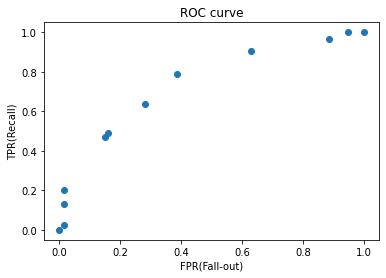

In [ ]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [ ]:
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,2.00
1,0.000000,0.032258,1.00
2,0.000000,0.048387,0.99
3,0.000000,0.056452,0.98
4,0.000000,0.104839,0.97
...,...,...,...
78,0.878788,1.000000,0.07
79,0.924242,1.000000,0.06
80,0.939394,1.000000,0.05
81,0.984848,1.000000,0.03


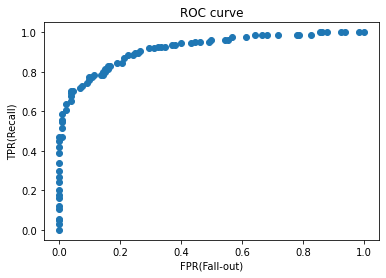

In [ ]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [ ]:
# threshold 최대값의 인덱스, np.argmax()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 33 , threshold: 0.64


In [ ]:
threshold = 0.64
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]
y_pred_th = (y_pred_proba > threshold).astype(int)

print(classification_report(y_val, y_pred_th))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       132
           1       0.88      0.76      0.81       124

    accuracy                           0.83       256
   macro avg       0.84      0.83      0.83       256
weighted avg       0.84      0.83      0.83       256



In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.9177052785923754

In [ ]:
# 교차검증

In [ ]:
# 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe = make_pipeline(
    RandomForestClassifier(random_state=2)
)
dists = { 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1)
}
clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('randomforestclassifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
                                                                     min_impurity_decrease=0.0,
                                           

In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)

최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 0.26244556763972426, 'randomforestclassifier__n_estimators': 217}


In [ ]:
target = 'recommendation'
features = train.drop(target, axis=1).columns

total = pd.concat([train, val])
X_total = total[features]
y_total = total[target]

In [ ]:
pipe = clf.best_estimator_

y_pred_cv = pipe.predict(X_val)
print(classification_report(y_val, y_pred_cv))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       132
           1       0.82      0.84      0.83       124

    accuracy                           0.83       256
   macro avg       0.83      0.83      0.83       256
weighted avg       0.83      0.83      0.83       256



Text(0.5, 1.0, 'Confusion matrix, n = 256')

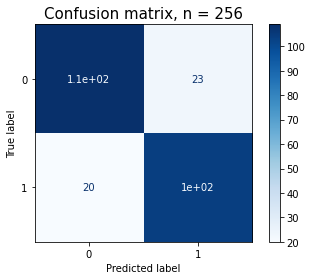

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [ ]:
# xgboost

In [ ]:
y_train.value_counts(normalize=True)

1    0.541544
0    0.458456
Name: recommendation, dtype: float64

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=1000,  # <= 1000 트리로 설정했지만, early stopping 에 따라 조절됩니다.
    # max_depth=7,        # default=3, high cardinality 특성을 위해 기본보다 높여 보았습니다.
    learning_rate=0.2,
    # scale_pos_weight=ratio, # imbalance 데이터 일 경우 비율을 적용합니다.
    n_jobs=-1
)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

xgb_model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='auc',
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤
         

[0]	validation_0-auc:0.794183	validation_1-auc:0.770528
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.83625	validation_1-auc:0.799181
[2]	validation_0-auc:0.841727	validation_1-auc:0.814272
[3]	validation_0-auc:0.8501	validation_1-auc:0.834066
[4]	validation_0-auc:0.855857	validation_1-auc:0.842956
[5]	validation_0-auc:0.85845	validation_1-auc:0.846011
[6]	validation_0-auc:0.864242	validation_1-auc:0.849218
[7]	validation_0-auc:0.867561	validation_1-auc:0.85157
[8]	validation_0-auc:0.870679	validation_1-auc:0.855663
[9]	validation_0-auc:0.873908	validation_1-auc:0.862384
[10]	validation_0-auc:0.876248	validation_1-auc:0.863514
[11]	validation_0-auc:0.880056	validation_1-auc:0.866569
[12]	validation_0-auc:0.882264	validation_1-auc:0.868157
[13]	validation_0-auc:0.885916	validation_1-auc:0.872159
[14]	validation_0-auc:0.887188	validation_1-auc:0.873686
[15

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print('검증 정확도', xgb_model.score(X_val, y_val))
print(classification_report(y_val, xgb_model.predict(X_val)))

검증 정확도 0.83984375
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       132
           1       0.82      0.86      0.84       124

    accuracy                           0.84       256
   macro avg       0.84      0.84      0.84       256
weighted avg       0.84      0.84      0.84       256



In [ ]:
# 모델 채택 -> 랜덤포레스트

In [ ]:
y_test_pred = pipe.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       143
           1       0.81      0.83      0.82       177

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



In [ ]:
y_test_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       143
           1       0.82      0.83      0.82       177

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



# 5. 머신러닝 모델 해석 - 시각화

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'annual_inc'

In [ ]:
isolated = pdp_isolate(
    model=rf_model, 
    dataset=X_val
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

In [ ]:
import xgboost
import shap

explainer = shap.TreeExplainer(pipe)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)